In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
container_event_column_name = ['container_id', 'machine_id', 'time_stamp', 'app_du', 'status',
                               'cpu_request', 'cpu_limit', 'mem_size']
container_usage_column_name = ['container_id', 'machine_id', 'time_stamp', 'cpu_util_percent', 'mem_util_percent', 'cpi', 'mem_gps',
                               'mpki', 'net_in', 'net_out', 'disk_io_percent']


In [3]:
file =   open('data\container_usage.csv', 'r', encoding='utf-8')
data = pd.read_csv(file)
df = pd.DataFrame(data)
df

,Unnamed: 0,m_108,696330,20,56,Unnamed: 5,Unnamed: 6,Unnamed: 7,0,0.1,2
0,NaN,m_108,698570,14,64,1.56,0.00,0.0,0.0,0.00,4.0
1,NaN,m_108,698620,12,64,1.46,0.03,0.0,0.0,0.00,4.0
2,NaN,m_108,698670,10,64,1.74,0.00,0.0,0.0,0.00,5.0
3,NaN,m_108,699740,7,65,1.57,0.02,0.0,0.0,0.00,6.0
4,NaN,m_108,700010,8,64,1.90,0.00,0.0,0.0,0.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...
99996,c_10097,m_1596,731090,4,100,1.19,0.00,0.0,0.1,0.12,14.0
99997,c_10097,m_1596,731210,5,99,1.37,0.00,1.0,0.1,0.12,11.0
99998,c_10097,m_1596,731580,5,99,1.50,0.00,1.0,0.1,0.12,15.0
99999,c_10097,m_1596,731960,4,99,1.65,0.00,1.0,0.1,0.12,19.0


In [4]:
df=df.dropna()
df

,Unnamed: 0,m_108,696330,20,56,Unnamed: 5,Unnamed: 6,Unnamed: 7,0,0.1,2
4198,c_1,m_2556,554700,44,94,0.98,0.64,0.0,1.54,1.55,16.0
4199,c_1,m_2556,554750,43,94,1.10,1.01,0.0,1.54,1.55,16.0
4202,c_1,m_2556,557230,54,94,1.55,0.03,0.0,1.55,1.55,14.0
4203,c_1,m_2556,557460,69,94,1.51,0.05,0.0,1.55,1.55,13.0
4204,c_1,m_2556,557490,67,95,1.32,1.14,0.0,1.55,1.55,13.0
...,...,...,...,...,...,...,...,...,...,...,...
99996,c_10097,m_1596,731090,4,100,1.19,0.00,0.0,0.10,0.12,14.0
99997,c_10097,m_1596,731210,5,99,1.37,0.00,1.0,0.10,0.12,11.0
99998,c_10097,m_1596,731580,5,99,1.50,0.00,1.0,0.10,0.12,15.0
99999,c_10097,m_1596,731960,4,99,1.65,0.00,1.0,0.10,0.12,19.0


In [5]:
df.columns = container_usage_column_name
grp = df[['time_stamp', 'container_id', 'cpu_util_percent']].groupby('cpu_util_percent')
mean_grp = grp.mean()
max_grp = grp.max()
min_grp = grp.min()
mean_cpu_usage_by_timestamp = mean_grp['time_stamp']
max_cpu_usage_by_timestamp = max_grp['time_stamp']
min_cpu_usage_by_timestamp = min_grp['time_stamp']


In [6]:
print("Minimum CPU usage based on time stamp", min_cpu_usage_by_timestamp)

print("Mean CPU usage")


Minimum CPU usage based on time stamp cpu_util_percent
0      553340
1      553440
2      553290
3      553500
4      553420
        ...  
96     631840
97     579980
98     555500
99     555950
100    553710
Name: time_stamp, Length: 91, dtype: int64
Mean CPU usage


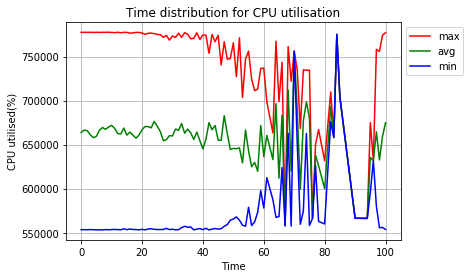

In [7]:
index = max_grp.index
plt.plot(index, max_cpu_usage_by_timestamp, 'r', label='max')
plt.plot(index, mean_cpu_usage_by_timestamp, 'green', label='avg')
plt.plot(index, min_cpu_usage_by_timestamp, 'b', label='min')

plt.legend(bbox_to_anchor=[1, 1])
plt.title('Time distribution for CPU utilisation')
plt.xlabel('Time')
plt.ylabel('CPU utilised(%)')
plt.grid()
plt.show()


In [8]:
#Group By Machine

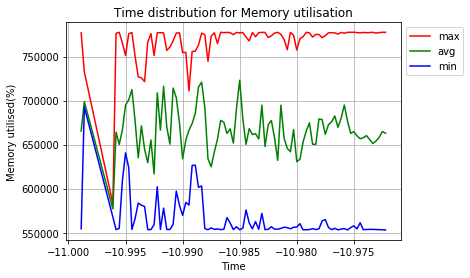

In [9]:
grp_machine = df[['time_stamp', 'container_id', 'mem_util_percent']].groupby('mem_util_percent')
mean_grp_machine = grp_machine.mean()
max_grp_machine = grp_machine.max()
min_grp_machine = grp_machine.min()
mean_machine_usage_by_timestamp = mean_grp_machine['time_stamp']
max_machine_usage_by_timestamp = max_grp_machine['time_stamp']
min_machine_usage_by_timestamp = min_grp_machine['time_stamp']
index = (max_grp_machine.index - 39600) / 3600
plt.plot(index, max_machine_usage_by_timestamp, 'r', label='max')
plt.plot(index, mean_machine_usage_by_timestamp, 'green', label='avg')
plt.plot(index, min_machine_usage_by_timestamp, 'b', label='min')

plt.legend(bbox_to_anchor=[1, 1])
plt.title('Time distribution for Memory utilisation')
plt.xlabel('Time')
plt.ylabel('Memory utilised(%)')
plt.grid()
plt.show()

In [10]:
batch_instance_column_name = ['instance_name', 'task_name', 'job_name', 'task_type', 'status', 'start_time',
                              'end_time', 'machine_id', 'seq_no', 'total_seq_no', 'cpu_avg', 'cpu_max', 'mem_avg', 'mem_max']

In [11]:
f = open('data/batch_instance.csv', 'r', encoding='utf-8')
data_batch_instance = pd.read_csv(f)
df_batch_instance = pd.DataFrame(data_batch_instance)
df_batch_instance.columns = batch_instance_column_name
df_batch_instance['time_consumed'] = abs(df_batch_instance['end_time'] - df_batch_instance['start_time'])
df_batch_instance

,instance_name,task_name,job_name,task_type,status,start_time,end_time,machine_id,seq_no,total_seq_no,cpu_avg,cpu_max,mem_avg,mem_max,time_consumed
0,ins_815802872,M1,j_1527,1,Terminated,158478,158520,m_3430,1,1,3.0,19.0,0.13,0.18,42
1,ins_564677701,M1,j_2014,1,Terminated,372602,372616,m_1910,1,1,87.0,116.0,0.04,0.05,14
2,ins_257566161,M1,j_2014,1,Terminated,372602,372615,m_2485,1,1,91.0,123.0,0.05,0.05,13
3,ins_688679908,M1,j_2014,1,Terminated,372602,372615,m_993,1,1,93.0,141.0,0.05,0.05,13
4,ins_929638393,M1,j_2014,1,Terminated,372603,372615,m_2808,1,1,100.0,137.0,0.05,0.05,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,ins_101135613,M12,j_127478,1,Terminated,111162,111256,m_3441,1,1,8.0,19.0,0.02,NaN,94
99997,ins_170672406,M12,j_127478,1,Terminated,111161,111237,m_2025,1,1,6.0,15.0,0.07,0.08,76
99998,ins_148745030,M10,j_127478,1,Terminated,111152,111184,m_3834,1,1,6.0,12.0,0.08,0.09,32
99999,ins_1012591717,M12,j_127478,1,Terminated,111180,111235,m_2180,1,1,9.0,15.0,0.02,0.07,55


In [12]:
grp_batch_instance = df_batch_instance[['time_consumed','start_time', 'end_time', 'status', 'cpu_avg']].groupby('status')
grp_batch_instance.head()

,time_consumed,start_time,end_time,status,cpu_avg
0,42,158478,158520,Terminated,3.0
1,14,372602,372616,Terminated,87.0
2,13,372602,372615,Terminated,91.0
3,13,372602,372615,Terminated,93.0
4,12,372603,372615,Terminated,100.0
511,600,99680,100280,Running,NaN
512,600,99680,100280,Running,NaN
513,600,99680,100280,Running,NaN
514,600,99680,100280,Running,NaN
515,600,99680,100280,Running,NaN


In [13]:
mean_grp_batch = grp_batch_instance.mean()
max_grp_batch = grp_batch_instance.max()
min_grp_batch = grp_batch_instance.min()
mean_cpu_usage_by_container = mean_grp_batch['time_consumed']
max_cpu_usage_by_container = max_grp_batch['time_consumed']
min_cpu_usage_by_container = min_grp_batch['time_consumed']


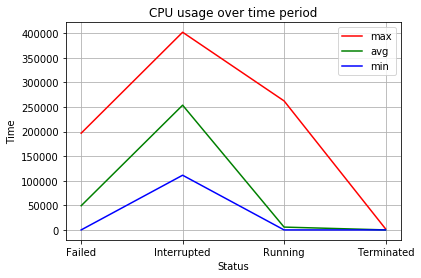

In [14]:
index = max_cpu_usage_by_container.index
plt.plot(index, max_cpu_usage_by_container, 'r', label='max')
plt.plot(index, mean_cpu_usage_by_container, 'green', label='avg')
plt.plot(index, min_cpu_usage_by_container, 'b', label='min')
# plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=[1, 1])
plt.title('CPU usage over time period')
plt.xlabel('Status')
plt.ylabel('Time')
plt.grid()
plt.show()

In [ ]:
grp_batch_instance = df_batch_instance[['time_consumed','start_time', 'end_time', 'status', 'cpu_avg']].groupby('cpu_avg')
grp_batch_instance.head()
mean_grp_batch = grp_batch_instance.mean()
max_grp_batch = grp_batch_instance.max()
min_grp_batch = grp_batch_instance.min()
mean_cpu_usage_by_container = mean_grp_batch['time_consumed']
max_cpu_usage_by_container = max_grp_batch['time_consumed']
min_cpu_usage_by_container = min_grp_batch['time_consumed']
index = max_cpu_usage_by_container.index
plt.plot(index, max_cpu_usage_by_container, 'r', label='max')
plt.plot(index, mean_cpu_usage_by_container, 'green', label='avg')
plt.plot(index, min_cpu_usage_by_container, 'b', label='min')
# plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=[1, 1])
plt.title('CPU usage by a instance')
plt.xlabel('Average CPU usage')
plt.ylabel('Portion of containers')
plt.grid()
plt.show()

In [ ]:
#Visualising the number of instances used in Time interval
import csv

df_batch_task = pd.DataFrame(pd.read_csv('data/batch_task.csv'))
batch_task_column_name = ['task_name', 'instance_num', 'job_name', 'task_type', 'status', 'start_time',
                              'end_time', 'plan_cpu', 'plan_mem']
df_batch_task.columns = batch_task_column_name
df_batch_task['task_create_time'] = df_batch_task['end_time'] - df_batch_task['start_time']

df_batch_task.head()

In [ ]:
max_val=df_batch_task['task_create_time'].max()

lb=0
ub=4
total=[]
variables=[]
flag=0
i=int(np.round(max_val/4))
ren=len(df_batch_task)
aaa=0
aa=0
sum_var=0
ii=0
for j in range (0,len(df_batch_task)):
    if df_batch_task['task_create_time'][j]==0:
        sum_var=aa
        aa=df_batch_task['instance_num'][j]+sum_var

In [ ]:
for i in range(0,int(np.round(max_val/4))):
    for j in range (0,len(df_batch_task)):
        if lb < df_batch_task['task_create_time'][j] <= ub:
            sum_var=aa
            aa=df_batch_task['instance_num'][j]+sum_var
    variables.append(aaa)
    if aa==0:
      aa=1
    total.append(aa)
    aa=0
    aaa=aaa+4


    lb=ub
    ub=ub+4

In [ ]:
csvD=[variables,total]
print(csvD)
A=zip(*csvD)
print(A)
with open('data/input_file.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(A)

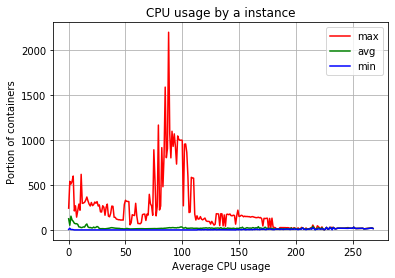

In [15]:
dataframe = pd.read_csv('data/final_input_file.csv')
dataframe.columns = ['time_interval', 'no_of_instances']
fig=plt.figure(figsize=(12,8))
plt.title("Instances utilised based on time")
plt.xlabel("Time")
plt.ylabel("Number of instances")
plt.plot(dataframe.time_interval, dataframe.no_of_instances)
plt.show()

In [16]:
#Visualising the number of instances used in Time interval
import csv

df_batch_task = pd.DataFrame(pd.read_csv('data/batch_task.csv'))
batch_task_column_name = ['task_name', 'instance_num', 'job_name', 'task_type', 'status', 'start_time',
                              'end_time', 'plan_cpu', 'plan_mem']
df_batch_task.columns = batch_task_column_name
df_batch_task['task_create_time'] = df_batch_task['end_time'] - df_batch_task['start_time']

df_batch_task.head()

,task_name,instance_num,job_name,task_type,status,start_time,end_time,plan_cpu,plan_mem,task_create_time
0,R2_1,1.0,j_2,1,Terminated,87076,87086,50.0,0.20,10
1,M1,1.0,j_2,1,Terminated,87076,87083,50.0,0.20,7
2,R6_3,371.0,j_3,1,Terminated,157297,157325,100.0,0.49,28
3,J4_2_3,1111.0,j_3,1,Terminated,157329,157376,100.0,0.59,47
4,R2_1,1.0,j_3,1,Terminated,157322,157328,100.0,0.39,6


In [17]:
max_val=df_batch_task['task_create_time'].max()

lb=0
ub=4
total=[]
variables=[]
flag=0
i=int(np.round(max_val/4))
ren=len(df_batch_task)
aaa=0
aa=0
sum_var=0
ii=0
for j in range (0,len(df_batch_task)):
    if df_batch_task['task_create_time'][j]==0:
        sum_var=aa
        aa=df_batch_task['instance_num'][j]+sum_var

In [18]:
for i in range(0,int(np.round(max_val/4))):
    for j in range (0,len(df_batch_task)):
        if lb < df_batch_task['task_create_time'][j] <= ub:
            sum_var=aa
            aa=df_batch_task['instance_num'][j]+sum_var
    variables.append(aaa)
    if aa==0:
      aa=1
    total.append(aa)
    aa=0
    aaa=aaa+4


    lb=ub
    ub=ub+4

In [19]:
csvD=[variables,total]
print(csvD)
A=zip(*csvD)
print(A)
with open('data/input_file.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(A)

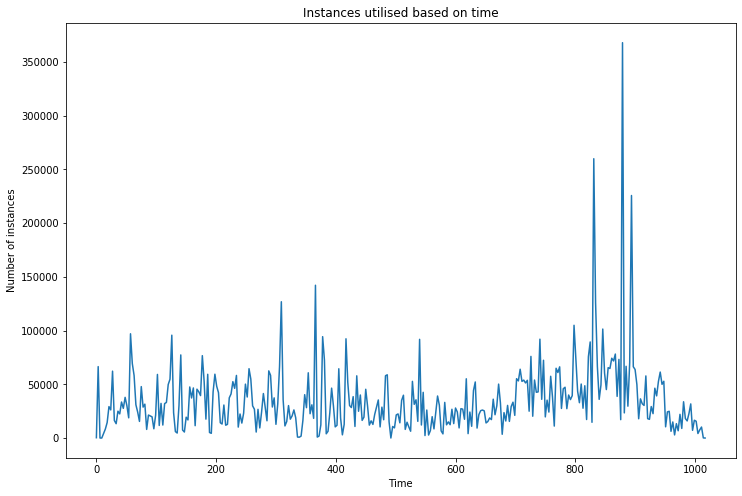

In [20]:
dataframe = pd.read_csv('data/final_input_file.csv')
dataframe.columns = ['time_interval', 'no_of_instances']
fig=plt.figure(figsize=(12,8))
plt.title("Instances utilised based on time")
plt.xlabel("Time")
plt.ylabel("Number of instances")
plt.plot(dataframe.time_interval, dataframe.no_of_instances)
plt.show()